In [1]:
import h5py
import numpy as np
import pandas as pd

### ===================================================================================== 

# PPPC Model data

In [14]:
path = "AtProduction_gammas.dat"
datContent = [i.strip().split() for i in open(path).readlines()]
column_names = datContent.pop(0)

In [15]:
#convert the .dat file into data frame
import csv
df = pd.read_csv("AtProduction_gammas.dat", delim_whitespace=True, names=column_names, )
print(df.columns)
df.head()

Index(['mDM', 'Log[10,x]', 'eL', 'eR', 'e', '\[Mu]L', '\[Mu]R', '\[Mu]',
       '\[Tau]L', '\[Tau]R', '\[Tau]', 'q', 'c', 'b', 't', 'WL', 'WT', 'W',
       'ZL', 'ZT', 'Z', 'g', '\[Gamma]', 'h', '\[Nu]e', '\[Nu]\[Mu]',
       '\[Nu]\[Tau]', 'V->e', 'V->\[Mu]', 'V->\[Tau]'],
      dtype='object')


,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
0,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
1,5,-8.9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0,0
2,5,-8.85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0,0
3,5,-8.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0,0
4,5,-8.75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0,0


### ====================================================================================

# Reading HDMSpectra data file

In [11]:
hf = h5py.File("HDMSpectra.hdf5", 'r')
print(list(hf.keys())) # print the keys in the data file
delta_coeff=hf.get("delta_coeff")
delta_coeff_data=np.array(delta_coeff)# store the each data in numpy array file format

['delta_coeff', 'high_gauge', 'high_higgs', 'high_leptons', 'high_quarks']


## HDMSpectra Matplotlib parameters 

In [43]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2



# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading HDMSpectra & data files

In [44]:
# Load HDMSpectra
from HDMSpectra import HDMSpectra
data = 'HDMSpectra.hdf5' # location of hdf5 file

# 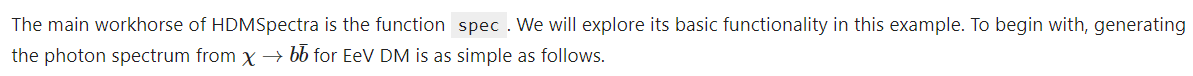

## HDMSpectra : Annihilation == False 

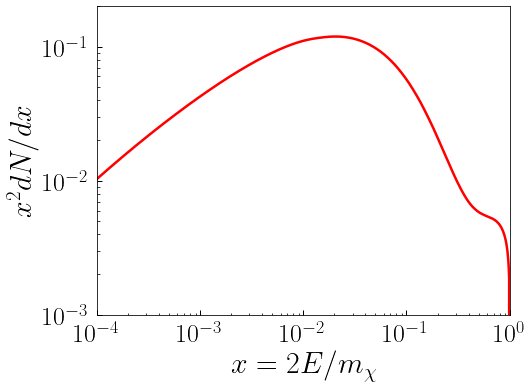

In [45]:
# Specify the particles
finalstate = 22 # pdg id of the photon
initialstate = 5 # pdg id of the b-quark
mDM = 1.e9 # dark matter mass in GeV, here 1 EeV
x = np.logspace(-4.,0.,1000) # Energy fraction values, x = 2E/mDM


# Extract the spectrum using HDMSpectra.spec
dNdx = HDMSpectra.spec(finalstate, initialstate, x, mDM, data)


# Plot the spectrum
fig, ax = plt.subplots(1, figsize=(7.5,5.5))

plt.plot(x, x**2.*dNdx, 
         lw=2.5, c='r')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.tight_layout()
plt.show()

### 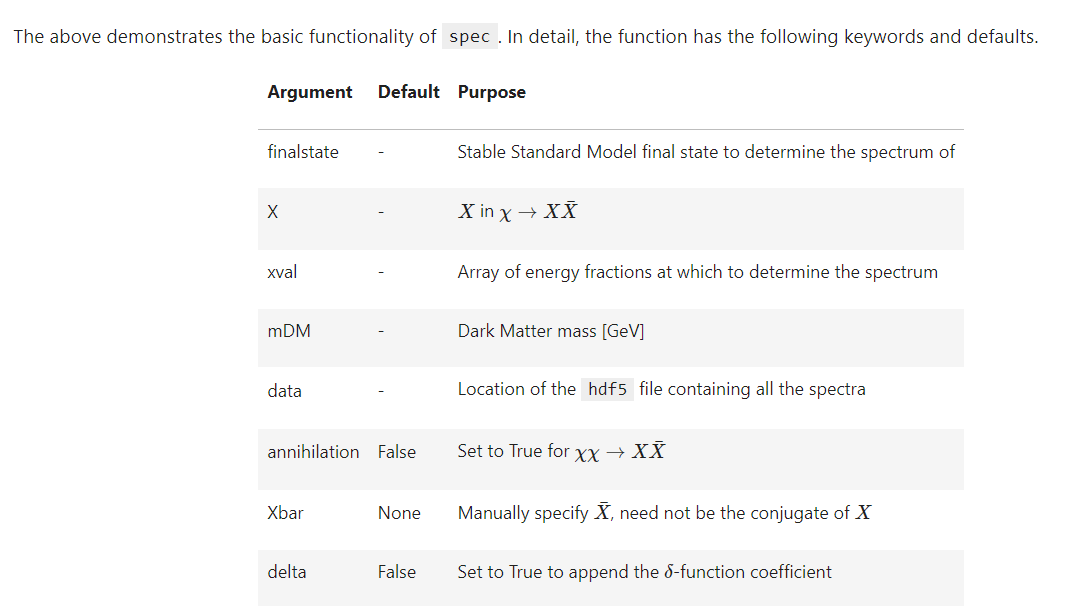# 

### 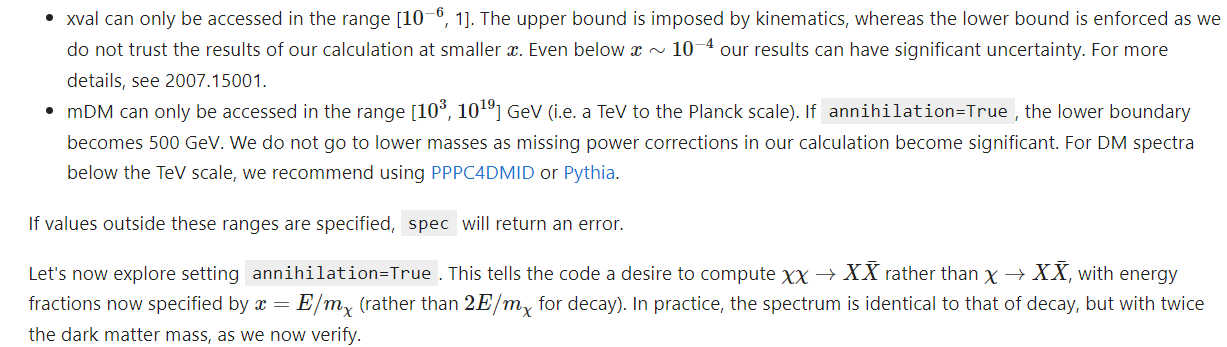

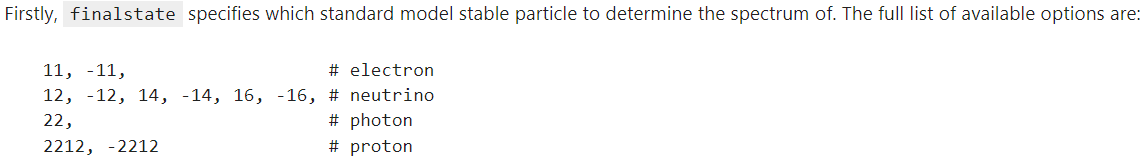

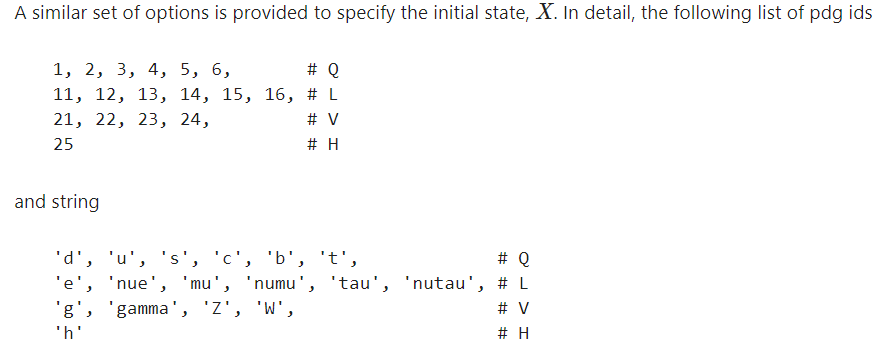

## HDMSpectra : Annihilation == True 

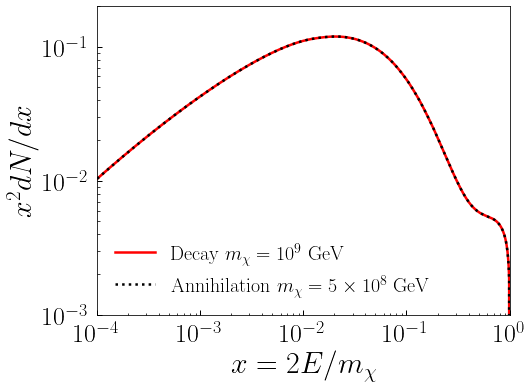

In [42]:
# We'll leave the basic arguments as above

finalstate = 22 
initialstate = 5 
mDM = 1.e9
x = np.logspace(-4.,0.,1000)


# Extract both spectra
dNdx_dec = HDMSpectra.spec(finalstate, initialstate, x, mDM, data)
dNdx_ann = HDMSpectra.spec(finalstate, initialstate, x, mDM/2., data, annihilation=True)


# Plot the spectrum
fig, ax = plt.subplots(1, figsize=(7.5, 5.5))

plt.plot(x, x**2.*dNdx_dec, 
         lw=2.5, c='red', label=r'Decay $m_{\chi} = 10^9$ GeV')

plt.plot(x, x**2.*dNdx_ann, 
         lw=2.5, c='black',ls=':', label=r'Annihilation $m_{\chi} = 5 \times 10^8$ GeV')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.legend(fontsize="20")
plt.tight_layout()
plt.show()

## HDM spectra(Fig 3) : paper (2007.15001) 

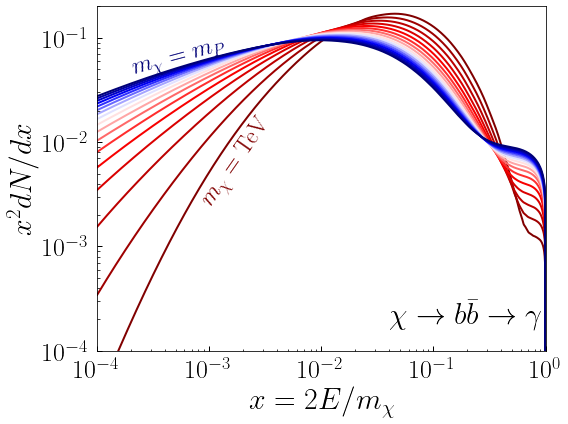

In [20]:
cm = plt.get_cmap('seismic')


mDM = np.logspace(3.,19,17) # masses [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark
low_id = 22 # pdg id of low scale state, here a photon

fig, ax = plt.subplots(1, figsize=(8, 6))

for i, m in enumerate(mDM):
    dNdx = HDMSpectra.spec(low_id, high_id, x, m, data)
    plt.plot(x, x**2.*dNdx, 
             lw=2., c=cm((len(mDM)-i)/float(len(mDM))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(4.e-2,10**(-3.75), r'$\chi \to b \bar{b} \to \gamma$', fontsize=30)
plt.text(2.e-4,10**(-1.35), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(mDM))),rotation=15)
plt.text(8.e-4,10**(-2.6), r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=55)

plt.tight_layout()
#plt.savefig('./bbbar_allM.png',bbox_inches='tight')
plt.show()

## HDMSpectra (Fig 1) : paper(2007.15001)  

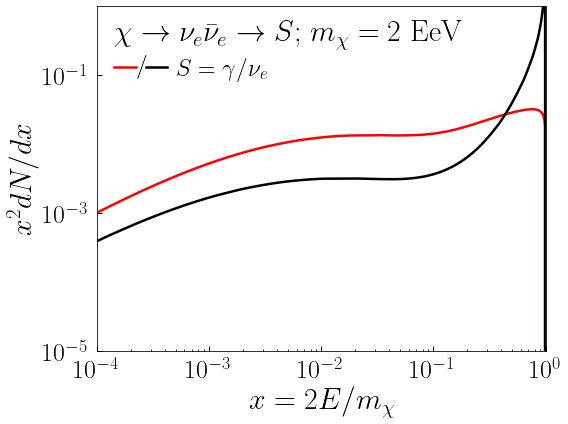

In [46]:
mDM = 2.e9 # mass [GeV]  # e9=Eev conventions
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue
low_id = 12 # low scale id, here nue
nue = HDMSpectra.spec(low_id, high_id, x, mDM, data)

low_id = 22 # low scale id, here photon
gam = HDMSpectra.spec(low_id, high_id, x, mDM, data)


fig, ax = plt.subplots(1, figsize=(8,6))

plt.plot(x, x**2.*gam, 
         lw=2.5, c='red')
plt.plot(x, x**2.*nue, 
         lw=2.5,c='black')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,1.e0])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

#legend to the plot
plt.plot([1.4e-4,2.2e-4],[10**(-0.88),10**(-0.88)],lw=2.5,c='red')
plt.text(2.25e-4,10**(-0.962),r'$/$',fontsize=24)
plt.plot([2.7e-4,10**(np.log10(2.7e-4)+0.19)],[10**(-0.88),10**(-0.88)], lw=2.5,
         c="black")
plt.text(1.4e-4,10**(-0.5),r'$\chi \to \nu_e \bar{\nu}_e \to S$; $m_{\chi} = 2$ EeV', fontsize=30)
plt.text(5.2e-4,10**(-1.),r'$S = \gamma / \nu_e$', fontsize=24)

plt.tight_layout()
plt.show()

## HDMSpectra  (photon as final state particle)

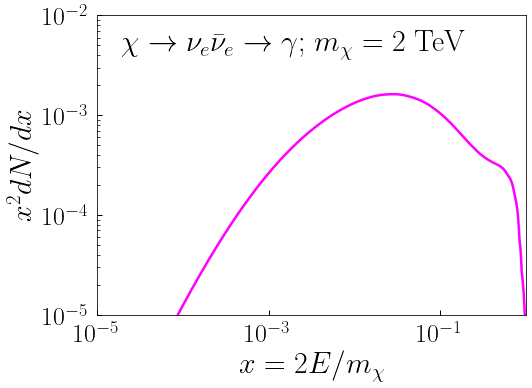

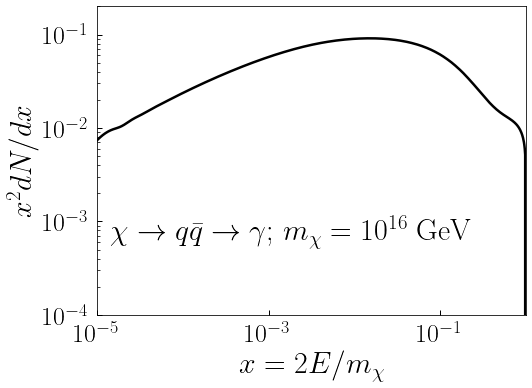

In [40]:
### upper panel
mDM = 2.e3 # mass [GeV]
x = np.logspace(-5.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue
low_id = 22 # low scale id, here photon

gam = HDMSpectra.spec(low_id, high_id, x, mDM, data)

fig, ax = plt.subplots(1, figsize=(7.5, 5.5))

plt.plot(x, x**2.*gam,
         lw=2.5, c='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.])
plt.ylim([1.e-5,1.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.text(1.9e-5,10**(-2.35),r'$\chi \to \nu_e \bar{\nu}_e \to \gamma$; $m_{\chi} =2$ TeV', fontsize=30)

plt.tight_layout()
plt.show()




### lower panel
mDM = 1.e16 # mass [GeV]
x = np.logspace(-5.,0.,1000) # energy fractions

low_id = 22 # pdg id of low scale state, here a photon

# q = (u+d+s)/3 (total content) # 1,2,3 particle id for d,u,s quarks 
gam = (HDMSpectra.spec(low_id, 1, x, mDM, data, data)
      +HDMSpectra.spec(low_id, 2, x, mDM, data, data)
      +HDMSpectra.spec(low_id, 3, x, mDM, data, data))/3.

fig, ax = plt.subplots(1, figsize=(7.5,5.5))

plt.plot(x, x**2.*gam,
         lw=2.5, c='black')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.4e-5,10**(-3.2),r'$\chi \to q \bar{q} \to \gamma$; $m_{\chi} = 10^{16}$ GeV', fontsize=30)

plt.tight_layout()
plt.show()